<a href="https://colab.research.google.com/github/rvjh/Customer_Segmentation_KMeans/blob/main/Customer_Segmentation_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

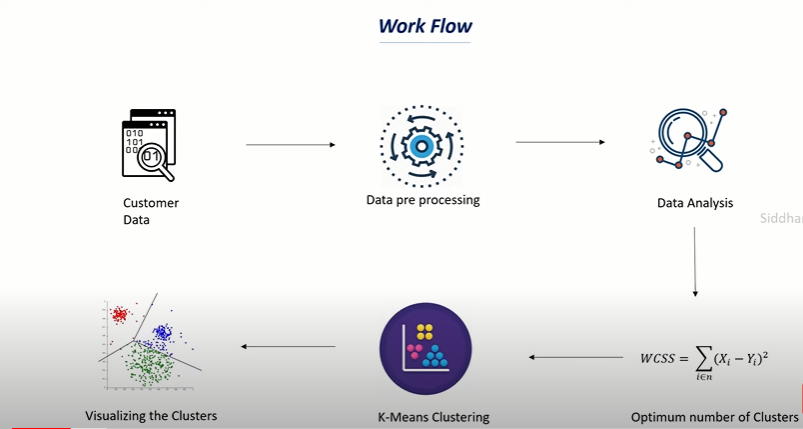

## Importing Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Collection and Analysis

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
customer_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
## spending score (1 to 100) i.e. if customer is buying more the sprnding score is high for that mall

In [7]:
## no of wows and columns
customer_data.shape

(200, 5)

In [8]:
## getting some more info

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
## customer id is not importannt and also only considering annual income and spending score

In [ ]:
X = customer_data.iloc[:,[3,4]].values
print(X)

## Choosing the cluster using WCSS(Within Cluster Sum of square)

In [12]:
## finding wcss values

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=20)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30566.45113025185,
 26127.94644929539,
 21818.114588452176,
 19657.78360870395]

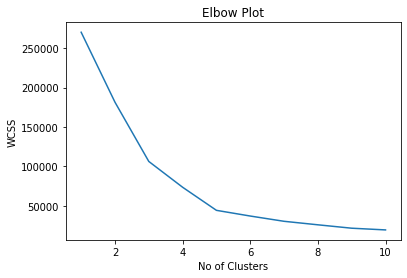

In [13]:
## plotting wlbow plot

plt.plot(range(1,11),wcss)
plt.title("Elbow Plot")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

#### so after cluster 5 there is no significant drop in the elbow line 
so optimum no of clusters = 5

Training the Kmeans model

In [14]:
kmeans = KMeans(n_clusters=5,init='k-means++',n_init=10,random_state=20)

## return a lebel for each data point for which cluster

Y = kmeans.fit_predict(X)
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

## Visualizing all the clusters

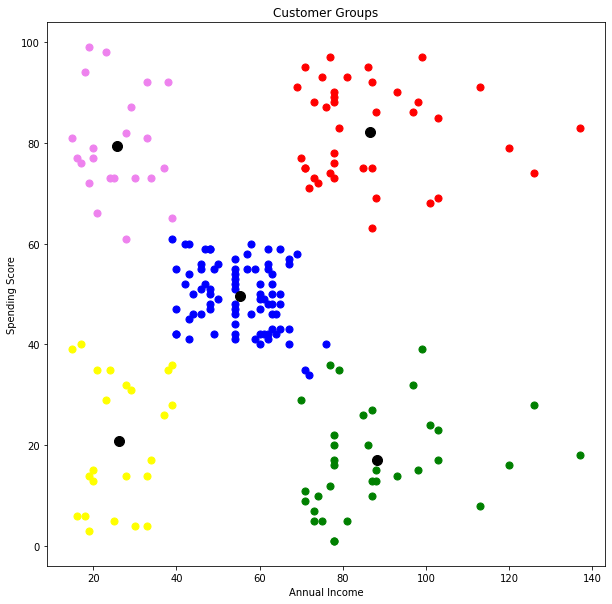

In [17]:
## plotting clusters for all data points  5 cluster 0,1,2,3,4


plt.figure(figsize=(10,10))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label="Cluster 1")
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label="Cluster 2")
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='blue',label="Cluster 3")
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='yellow',label="Cluster 4")
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='violet',label="Cluster 5")

## plot centroids 

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label="Centroids")
            ## x axis value of centroid  ## y axis value of centroid 

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

### Observations:

In [18]:
##1. Consider violet colour points where they have less annual income but they have highspending score
##2. red color points have high annual income as well as high spending score



## so companies can give offer to thoose customers who has high spending score